# ML/AI Engineering Foundations: Final Portfolio
The following Jupyter notebook was created as a part of the final project for\
the Codecademy course 
["ML/AI Engineering Foundations"](https://www.codecademy.com/learn/paths/machine-learning|ai|engineering|foundations). 

## Topic
This project will investigate the relationship between book genre and sales \
over time. In order to do this the following dataset will be used:\
[Data Science Job Salaries](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

This dataset is described by it's author as the following:
> Salaries of jobs in the Data Science domain

This data set contains the following fields:
| Field                 | Description                                                                                                                                                                                       |
| --------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| work_year             | The year the salary was paid.                                                                                                                                                                     |
| experience_level      | The experience level in the job during the year with the following possible values: (EN: Entry-level/Junior) (MI: Mid-level/Intermediate) (SE: Senior-level/Expert) (EX: Executive-level/Director)|
| employment_type       | The type of employement for the role: (PT: Part-time) (FT: Full-time) (CT: Contract) (FL: Freelance)                                                                                              |
| salary                | The total gross salary amount paid.                                                                                                                                                               |
| job_title             | The role worked in during the year.                                                                                                                                                               |
| salary_currency       | The currency of the salary paid as an ISO 4217 currency code.                                                                                                                                     |
| salary_in_usd         | The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).                                                                                             |
| employee_residence    | Employee's primary country of residence in during the work year as an ISO 3166 country code.                                                                                                      |
| remote_ratio          | The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)                                   |
| company_location      | The country of the employer's main office or contracting branch as an ISO 3166 country code.                                                                                                      |
| company_size          | The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)                       |

The bellow cell is used in to import the dataset (not included within the\
repository as including the dataset this way can be bad practice, as a dataset\
can easily be very large and complex):

In [40]:
import kaggle

kaggle.api.authenticate()

kaggle.api.dataset_download_files(dataset = 'ruchi798/data-science-job-salaries', path = './', unzip = True)

## Data Analysis
With the dataset selected, the next step of the project is to determine how\
this dataset might be analysed. The chosen analytical targets are all based on\
the "job_title" field. This field was selected as it will provide the most\
useful information on the topic based on the dataset, In order to do this the\
following tasks must be completed:
- Load dataset into dataframe
- Basic initial data sanitisation
  - Check for null values, especially in the "job_title" field
  - Check for misspellings in the "job_title" field
- Separate by job title
- Determine the proportion of each job title
- Task 1: Change of salaries for the same role over time
- Task 2: Salary for the same role for different countries
- Task 3: Salary based on experience levels

These tasks will be further broken down once they are reached.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
df = pd.read_csv('ds_salaries.csv')

print(df.columns)

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')


In [42]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [43]:
df.describe(include='all')

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,607.000000,607.000000,607,607,607,6.070000e+02,607,607.000000,607,607.00000,607,607
unique,NaN,NaN,4,4,50,NaN,17,NaN,57,NaN,50,3
top,NaN,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,NaN,280,588,143,NaN,398,NaN,332,NaN,355,326
mean,303.000000,2021.405272,NaN,NaN,NaN,3.240001e+05,NaN,112297.869852,NaN,70.92257,NaN,NaN
std,175.370085,0.692133,NaN,NaN,NaN,1.544357e+06,NaN,70957.259411,NaN,40.70913,NaN,NaN
min,0.000000,2020.000000,NaN,NaN,NaN,4.000000e+03,NaN,2859.000000,NaN,0.00000,NaN,NaN
25%,151.500000,2021.000000,NaN,NaN,NaN,7.000000e+04,NaN,62726.000000,NaN,50.00000,NaN,NaN
50%,303.000000,2022.000000,NaN,NaN,NaN,1.150000e+05,NaN,101570.000000,NaN,100.00000,NaN,NaN
75%,454.500000,2022.000000,NaN,NaN,NaN,1.650000e+05,NaN,150000.000000,NaN,100.00000,NaN,NaN


In [44]:
print(df.dtypes)

Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


In [45]:
df['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [46]:
df['work_year'].unique()

array([2020, 2021, 2022], dtype=int64)

In [47]:
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [48]:
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [62]:
df['remote_ratio'].value_counts()

remote_ratio
100    381
0      127
50      99
Name: count, dtype: int64

In [49]:
df['job_title'].value_counts()

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                  

# Data sanitisation

After investigating the dataset, some additional tasks have been added to the\
initial expected data sanitization. The following tasks have been added:

- Convert "Experience level" to a numerical value
- ones-hot encode "employment type" and "experience_level"
- Remove "salary", "salary_currency", and "employee_residence" columns

Additionally, the following columns will be removed unless required for a\
particular analytical task:

- "remote_ratio"
- "company_location"
- "company_size"


In [50]:
# Define the sub-sector mapping
sub_sector_mapping = {
    'Data Scientist': 'Data Science',
    'Data Engineer': 'Data Engineering',
    'Data Analyst': 'Data Analysis',
    'Machine Learning Engineer': 'Machine Learning',
    'Research Scientist': 'Research',
    'Data Science Manager': 'Data Science Management',
    'Data Architect': 'Data Architecture',
    'Big Data Engineer': 'Big Data',
    'Machine Learning Scientist': 'Machine Learning',
    'Principal Data Scientist': 'Data Science',
    'AI Scientist': 'AI',
    'Data Science Consultant': 'Data Science',
    'Director of Data Science': 'Data Science Management',
    'Data Analytics Manager': 'Data Analysis Management',
    'ML Engineer': 'Machine Learning',
    'Computer Vision Engineer': 'Computer Vision',
    'BI Data Analyst': 'Data Analysis',
    'Lead Data Engineer': 'Data Engineering',
    'Data Engineering Manager': 'Data Engineering Management',
    'Business Data Analyst': 'Data Analysis',
    'Head of Data': 'Data Management',
    'Applied Data Scientist': 'Data Science',
    'Applied Machine Learning Scientist': 'Machine Learning',
    'Head of Data Science': 'Data Science Management',
    'Analytics Engineer': 'Analytics',
    'Data Analytics Engineer': 'Data Engineering',
    'Machine Learning Developer': 'Machine Learning',
    'Machine Learning Infrastructure Engineer': 'Machine Learning',
    'Lead Data Scientist': 'Data Science',
    'Computer Vision Software Engineer': 'Computer Vision',
    'Lead Data Analyst': 'Data Analysis',
    'Data Science Engineer': 'Data Science',
    'Principal Data Engineer': 'Data Engineering',
    'Principal Data Analyst': 'Data Analysis',
    'ETL Developer': 'Data Engineering',
    'Product Data Analyst': 'Data Analysis',
    'Director of Data Engineering': 'Data Engineering Management',
    'Financial Data Analyst': 'Data Analysis',
    'Cloud Data Engineer': 'Data Engineering',
    'Lead Machine Learning Engineer': 'Machine Learning',
    'NLP Engineer': 'Machine Learning',
    'Head of Machine Learning': 'Machine Learning Management',
    '3D Computer Vision Researcher': 'Computer Vision',
    'Data Specialist': 'Data Analysis',
    'Staff Data Scientist': 'Data Science',
    'Big Data Architect': 'Big Data',
    'Finance Data Analyst': 'Data Analysis',
    'Marketing Data Analyst': 'Data Analysis',
    'Machine Learning Manager': 'Machine Learning Management',
    'Data Analytics Lead': 'Data Analysis Management'
}

                       job_title employment_type       sub_sector  \
0  3D Computer Vision Researcher              PT  Computer Vision   
1                   AI Scientist              FT               AI   
2                   AI Scientist              PT               AI   
3             Analytics Engineer              FT        Analytics   
4         Applied Data Scientist              FT     Data Science   

   remote_ratio  
0          50.0  
1          70.0  
2         100.0  
3          50.0  
4          70.0  


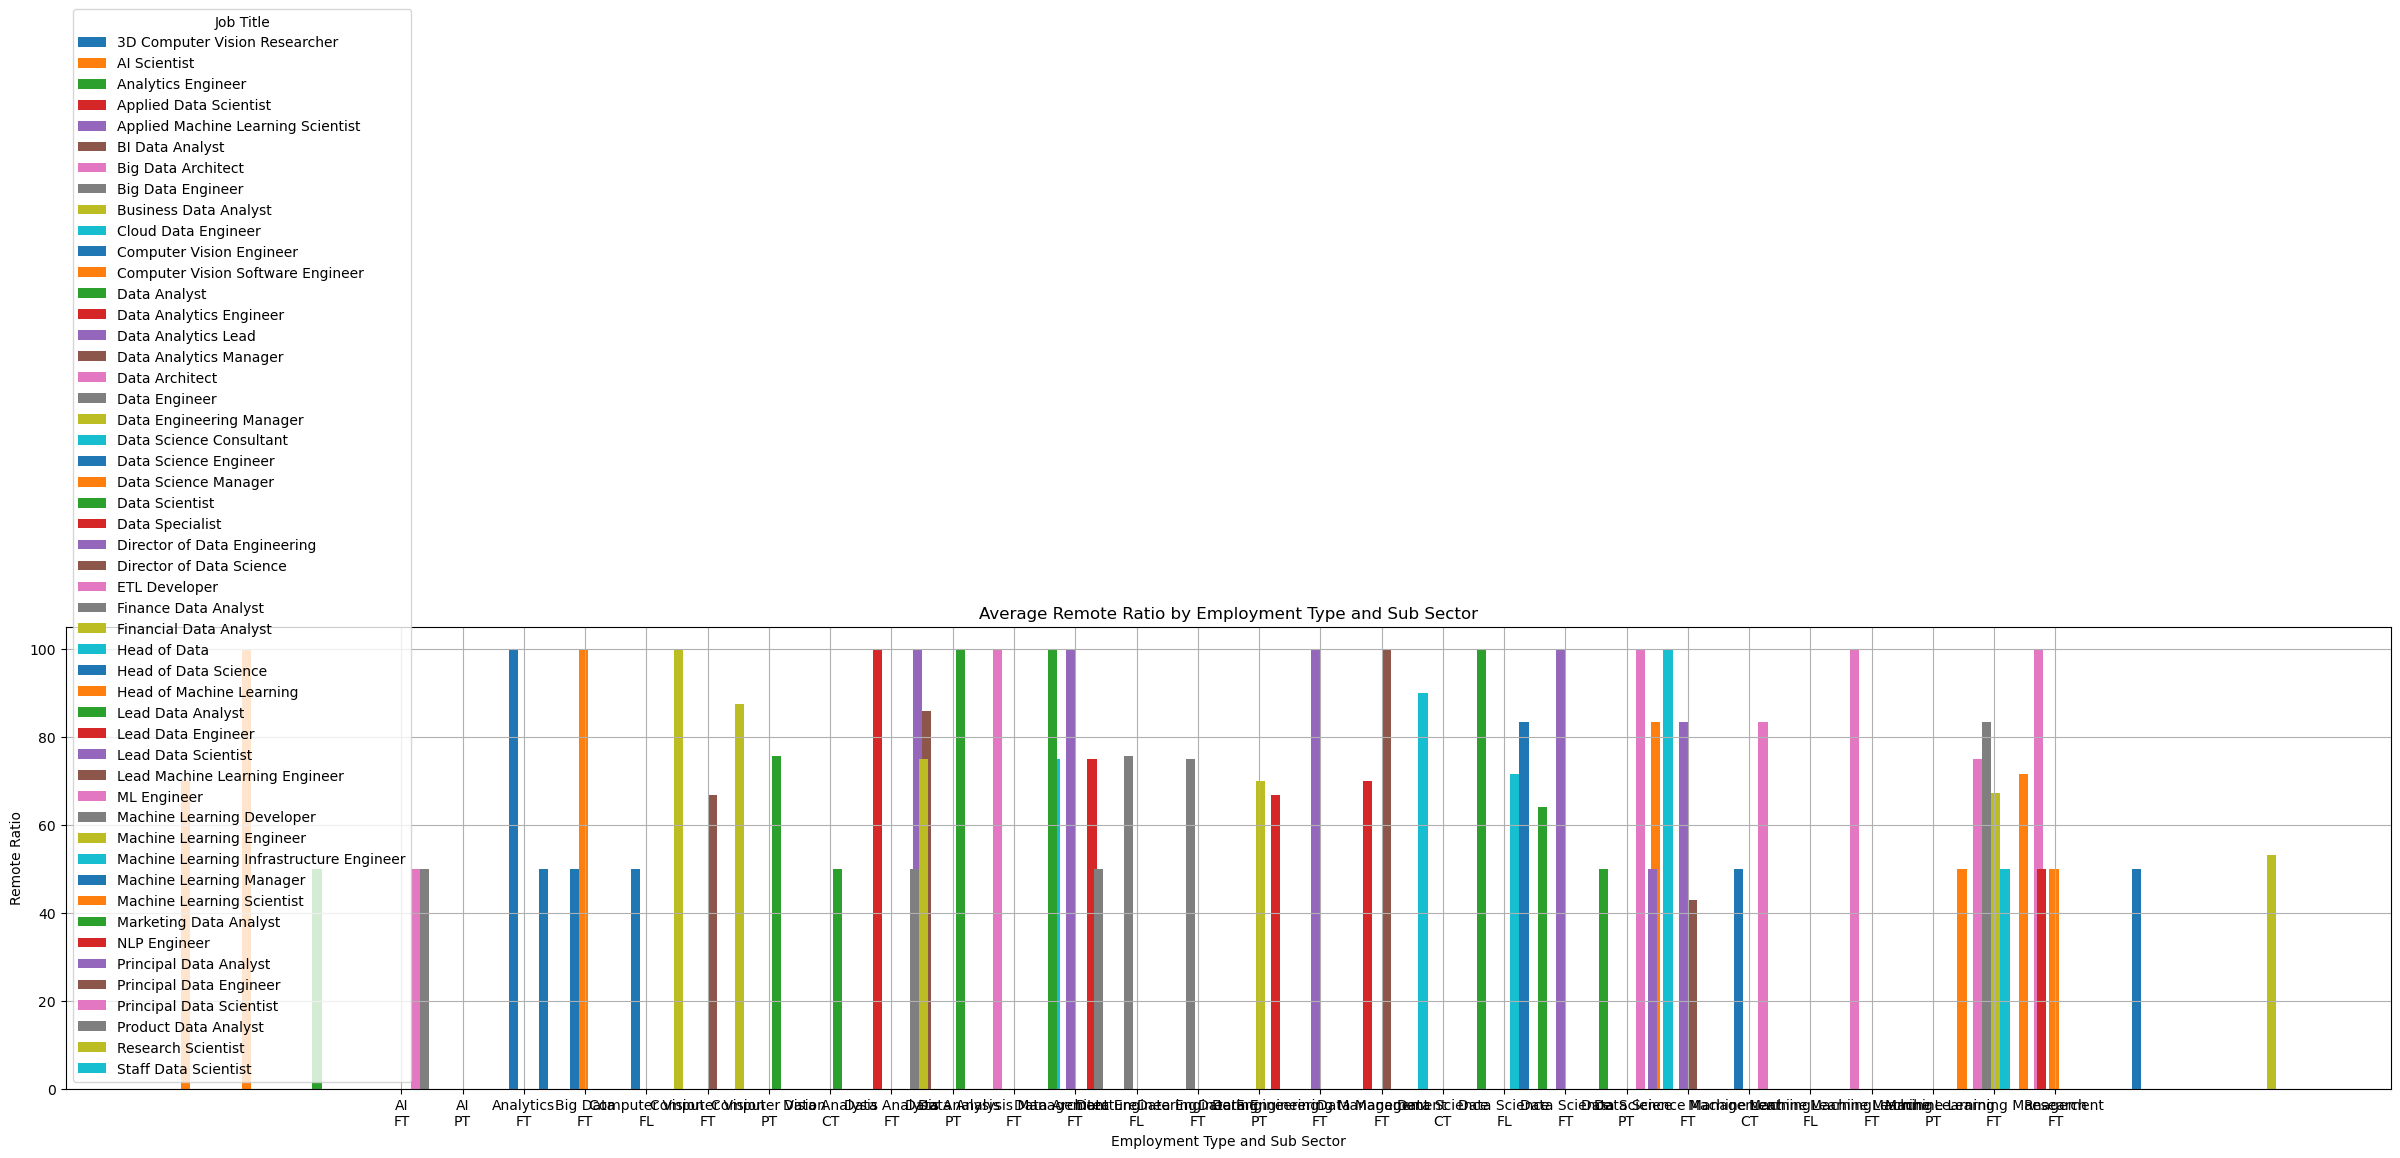

'\nUnnamed: 0             int64\nwork_year              int64\nexperience_level      object\nemployment_type       object\njob_title             object\nsalary                 int64\nsalary_currency       object\nsalary_in_usd          int64\nemployee_residence    object\nremote_ratio           int64\ncompany_location      object\ncompany_size          object\ndtype: object\n'

In [55]:
pretask1 = df.copy()
task1 = df.copy()

# Add the sub-sector column
task1['sub_sector'] = pretask1['job_title'].map(sub_sector_mapping)

# Group by job_title, employment_type, and sub_sector
task1 = task1.groupby(['job_title', 'employment_type', 'sub_sector'])['remote_ratio'].mean().reset_index()

print(task1.head())

# Pivot the data for plotting
pivot_data = task1.pivot(index=['sub_sector', 'employment_type'], columns='job_title', values='remote_ratio').fillna(0)

# Plot the data as a grouped bar chart
fig, ax = plt.subplots(figsize=(30, 6))

# Set the bar width
bar_width = 0.15
bar_positions = np.arange(len(pivot_data))

# Generate bar plots for each job_title
for i, job_title in enumerate(pivot_data.columns):
    ax.bar(bar_positions + i * bar_width, pivot_data[job_title], bar_width, label=job_title)

# Set the x-axis labels and tick positions
ax.set_xticks(bar_positions + bar_width * (len(pivot_data.columns) / 2 - 0.5))
ax.set_xticklabels([f"{sub_sector}\n{employment_type}" for sub_sector, employment_type in pivot_data.index])

plt.title('Average Remote Ratio by Employment Type and Sub Sector')
plt.xlabel('Employment Type and Sub Sector')
plt.ylabel('Remote Ratio')
plt.legend(title='Job Title')
plt.grid(True)
plt.show()

"""
Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object
"""

# Add the sub-sector column
task1['sub_sector'] = pretask1['job_title'].map(sub_sector_mapping)

# Group by job_title, employment_type, and sub_sector
task1 = task1.groupby(['job_title', 'employment_type', 'sub_sector'])['remote_ratio'].mean().reset_index()

# Get unique sub_sectors
sub_sectors = task1['sub_sector'].unique()

# Determine the layout of subplots (number of rows and columns)
n_cols = 3  # You can adjust this to fit your needs
n_rows = int(np.ceil(len(sub_sectors) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 6 * n_rows), sharey=True)

if n_rows == 1:
    axes = axes[np.newaxis, :]  # Ensure axes is 2D array even for a single row

# Plot each sub_sector in its own subplot
for ax, sub_sector in zip(axes.flat, sub_sectors):
    sub_data = task1[task1['sub_sector'] == sub_sector]
    pivot_data = sub_data.pivot(index='employment_type', columns='job_title', values='remote_ratio').fillna(0)
    
    bar_width = 0.2
    bar_positions = np.arange(len(pivot_data))
    
    for i, job_title in enumerate(pivot_data.columns):
        ax.bar(bar_positions + i * bar_width, pivot_data[job_title], bar_width, label=job_title)

    ax.set_title(sub_sector)
    ax.set_xlabel('Employment Type')
    ax.set_ylabel('Remote Ratio')
    ax.set_xticks(bar_positions + bar_width * (len(pivot_data.columns) / 2 - 0.5))
    ax.set_xticklabels(pivot_data.index)
    ax.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True)

    # Set y-axis limit to start from -5 to ensure 0 values are visible
    ax.set_ylim(-5, 105)

# Hide any unused subplots
for ax in axes.flat[len(sub_sectors):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

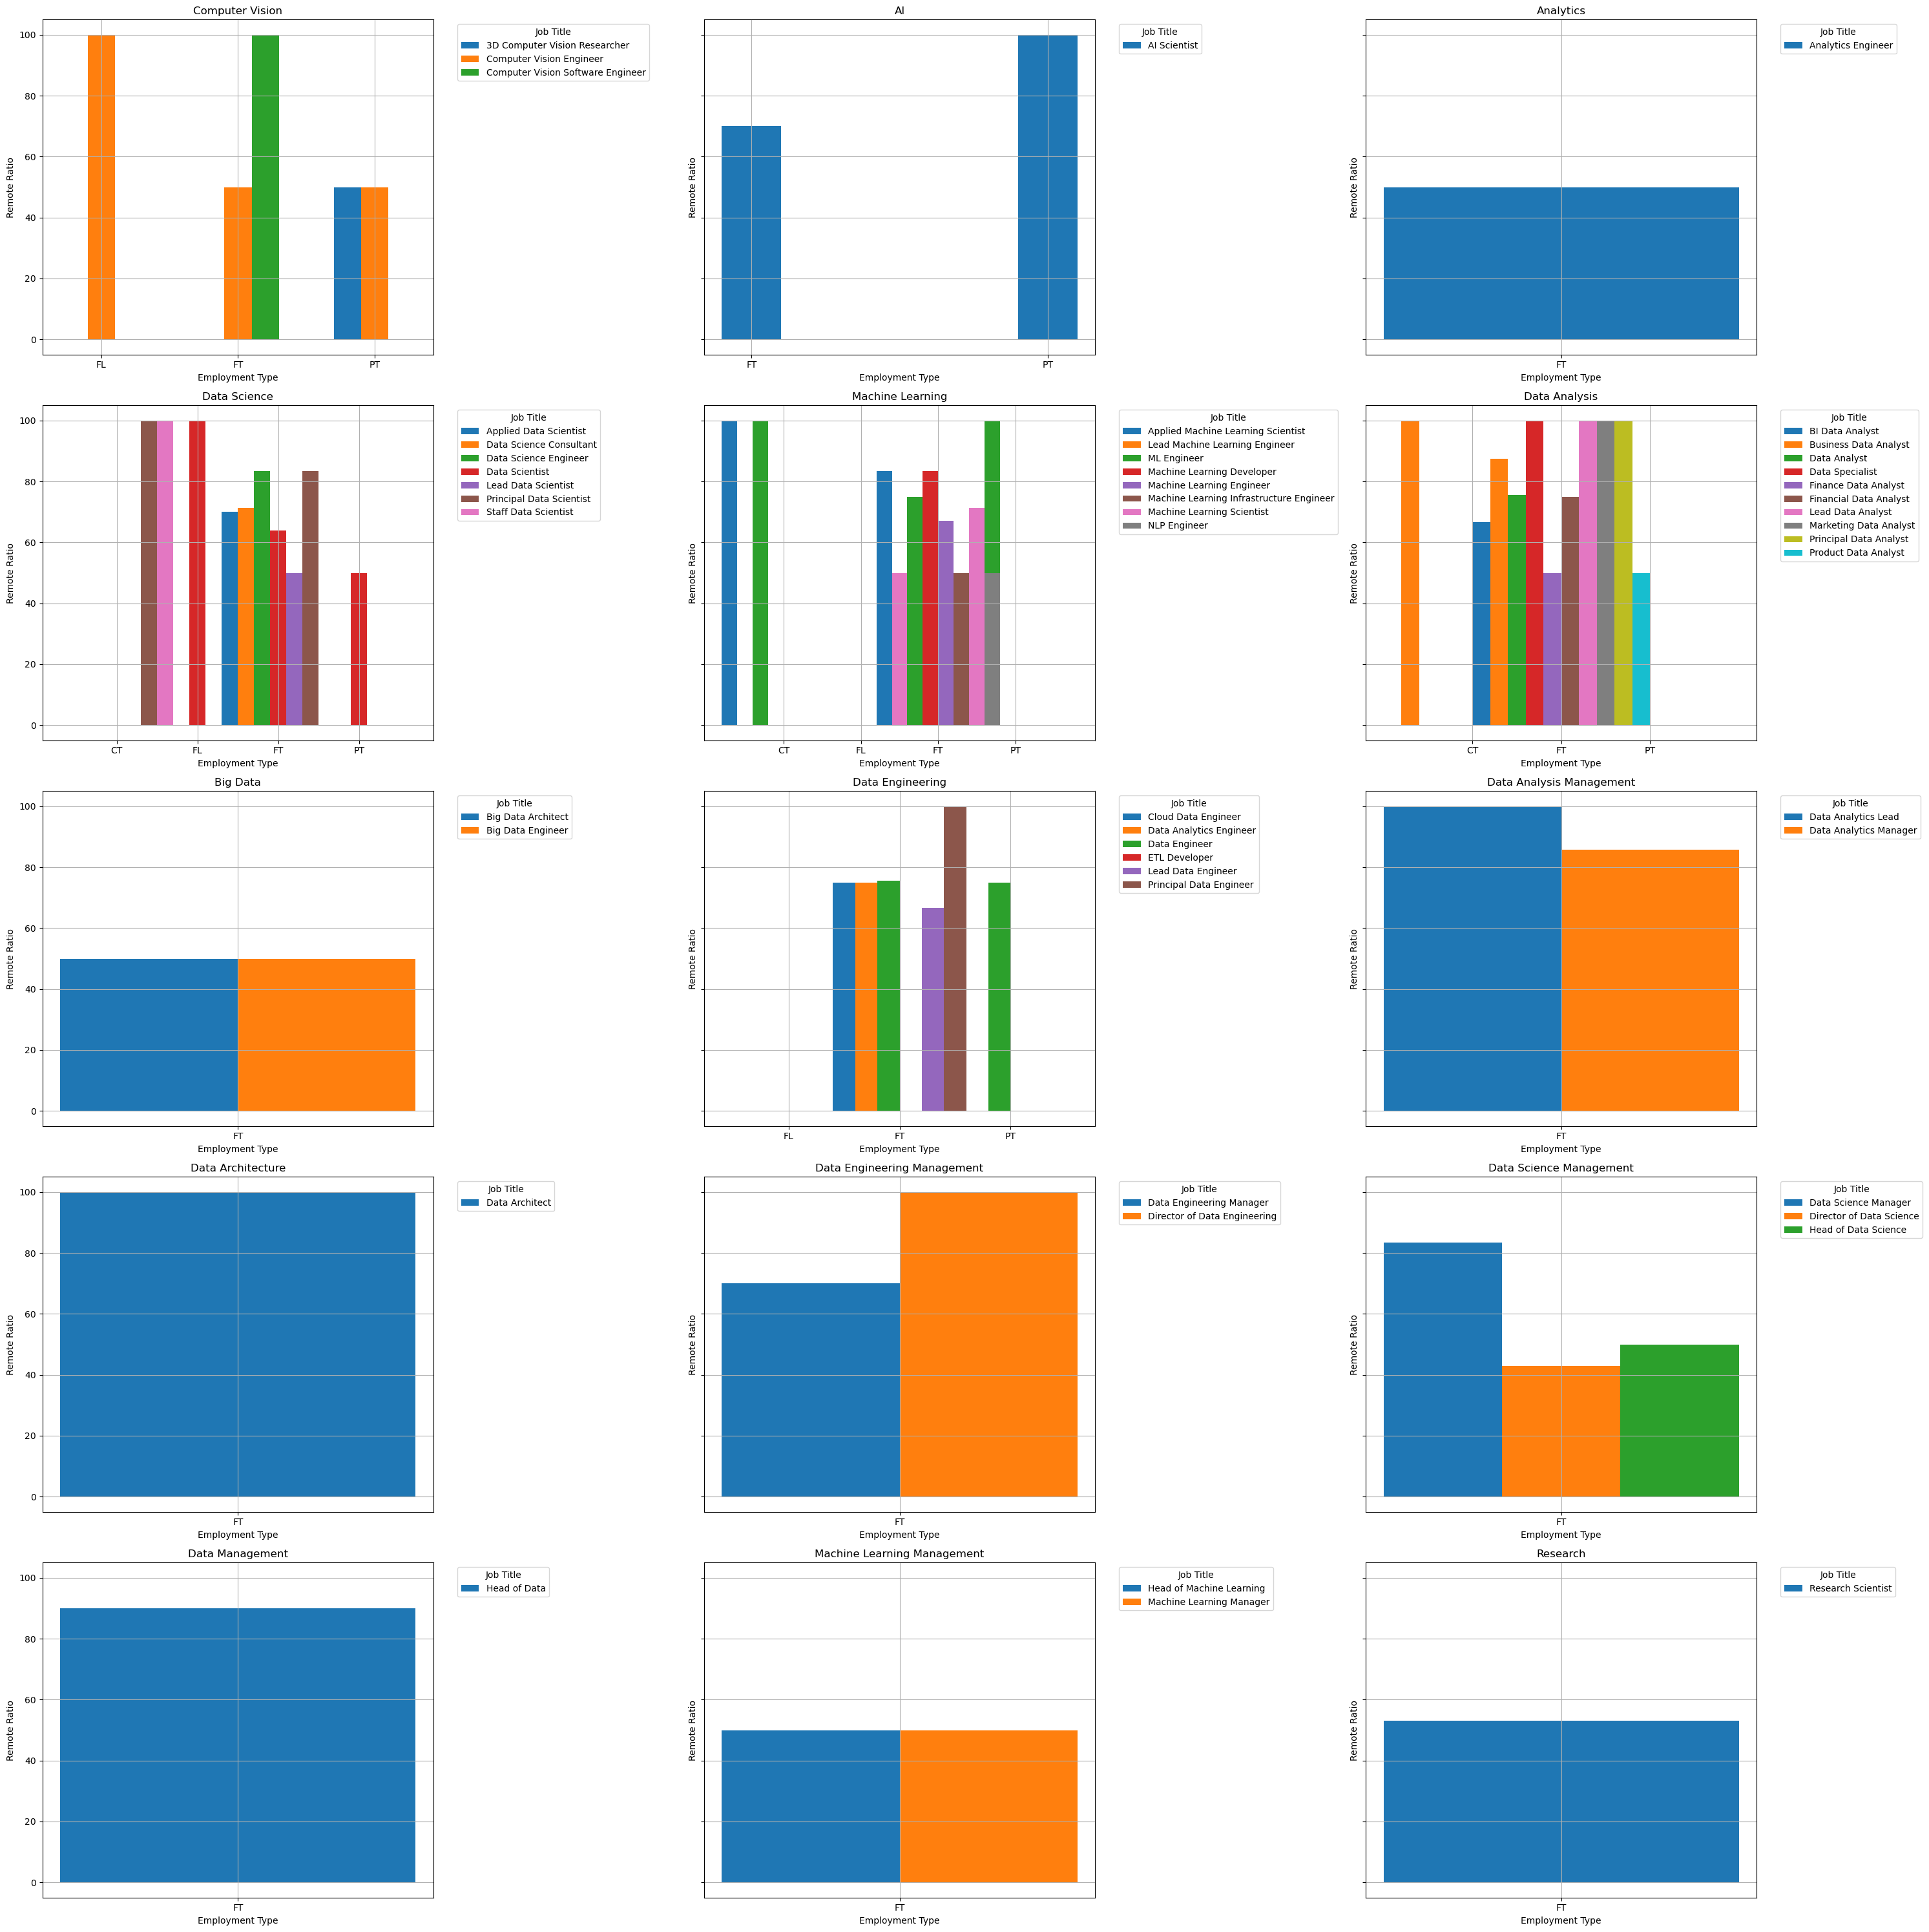

In [66]:
pretask1 = df.copy()
task1 = df.copy()

# Add the sub-sector column
task1['sub_sector'] = pretask1['job_title'].map(sub_sector_mapping)

# Group by job_title, employment_type, and sub_sector
task1 = task1.groupby(['job_title', 'employment_type', 'sub_sector'])['remote_ratio'].mean().reset_index()

# Get unique sub_sectors
sub_sectors = task1['sub_sector'].unique()

# Determine the layout of subplots (number of rows and columns)
n_cols = 3  # You can adjust this to fit your needs
n_rows = int(np.ceil(len(sub_sectors) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 6 * n_rows), sharey=True)

if n_rows == 1:
    axes = axes[np.newaxis, :]  # Ensure axes is 2D array even for a single row

# Plot each sub_sector in its own subplot
for ax, sub_sector in zip(axes.flat, sub_sectors):
    sub_data = task1[task1['sub_sector'] == sub_sector]
    pivot_data = sub_data.pivot(index='employment_type', columns='job_title', values='remote_ratio').fillna(0)
    
    bar_width = 0.2
    bar_positions = np.arange(len(pivot_data))
    
    for i, job_title in enumerate(pivot_data.columns):
        ax.bar(bar_positions + i * bar_width, pivot_data[job_title], bar_width, label=job_title)

    ax.set_title(sub_sector)
    ax.set_xlabel('Employment Type')
    ax.set_ylabel('Remote Ratio')
    ax.set_xticks(bar_positions + bar_width * (len(pivot_data.columns) / 2 - 0.5))
    ax.set_xticklabels(pivot_data.index)
    ax.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True)

    # Set y-axis limit to start from -5 to ensure 0 values are visible
    ax.set_ylim(-5, 105)

# Hide any unused subplots
for ax in axes.flat[len(sub_sectors):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

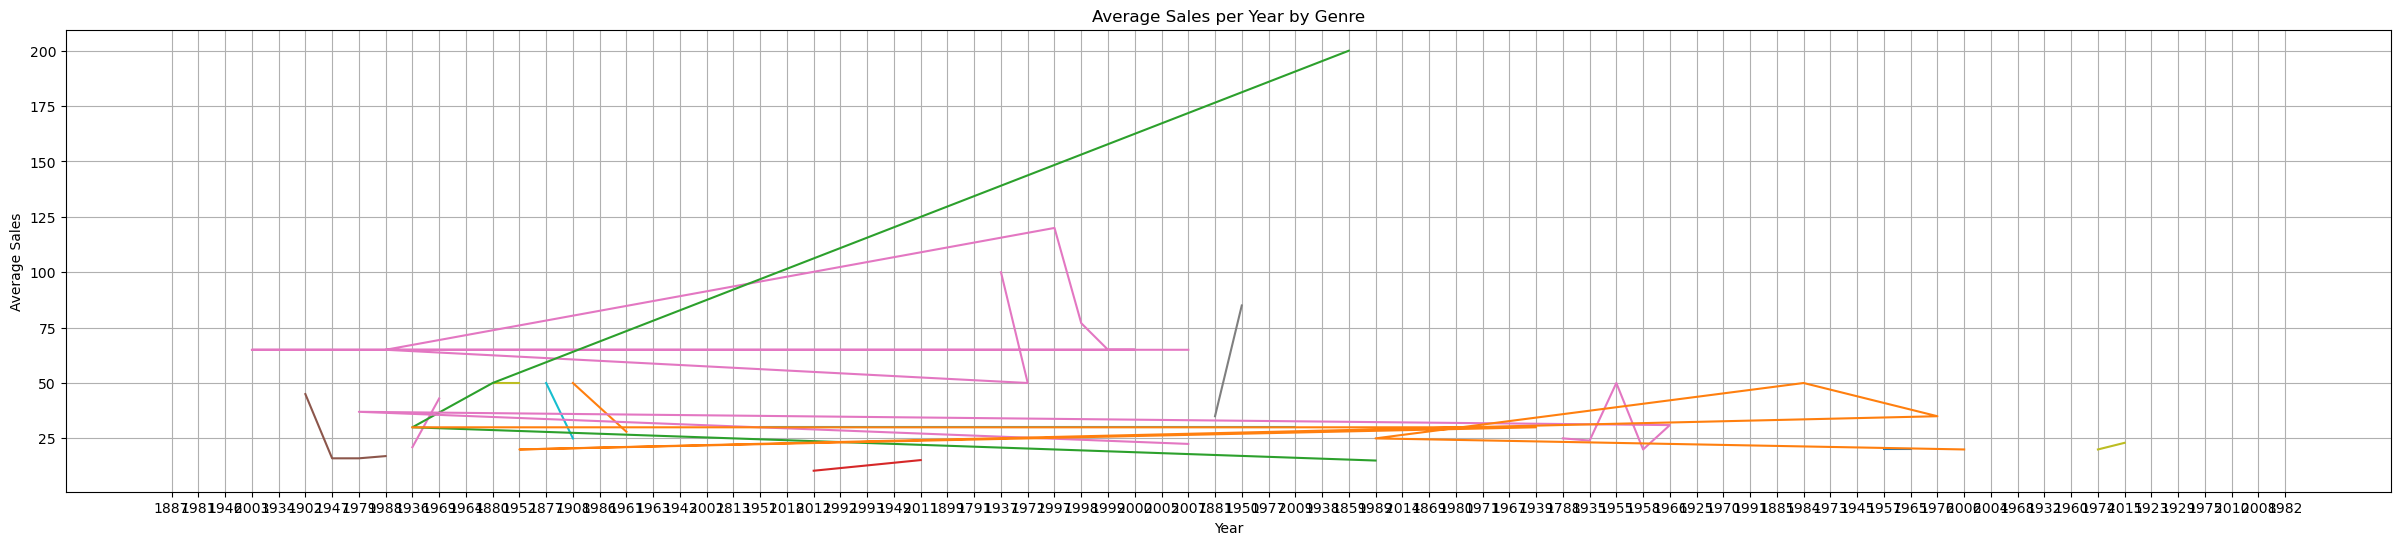

In [27]:
genre_year_sales = df.groupby(['Genre', 'First published'])['Approximate sales'].mean().reset_index()

plt.figure(figsize=(30, 6))

for genre in genre_year_sales['Genre'].unique():
    genre_data = genre_year_sales[genre_year_sales['Genre'] == genre]
    plt.plot(genre_data['First published'], genre_data['Approximate sales'], label=genre)
    
plt.title('Average Sales per Year by Genre')
plt.xlabel('Year')
plt.ylabel('Average Sales')
# plt.legend()
plt.grid(True)
plt.show()